1 - README.md

# 2 - Load Data

**WORK WITH TIME-SERIES DATA:**

- When working with time-series data such as Bitcoin prediction problem, it is recommended to set `shuffle=False` when splitting data into train-test. (This is because if `shuffle=True`, we may end up predicting past Bitcoin prices). <br>
For other prediction problems such as house prices or car prices, it is appropriate to set `shuffle=True` (because if `shuffle=False`, for example, the house price data is sorted by price, then there is a risk of falling into the case where all houses put into the test set have higher/lower values than the average and this will result in a poor model).
- This data is time series it's sequential -> we don't use Cross-Validation or any of the model ML techniques to evaluate error. TimeSeriesSplit, which is a specific type of cross-validation technique used for time series data. It's important to use time-series cross-validation when dealing with sequential data to avoid training on future data. <br> TimeSeriesSplit splits the data into folds, so that the folds with data from the previous past will be used as the training set, and the future data will only be used as the test set. For example, if we split the data into 3 folds, each fold would consist of:
    - Fold 1: Data from January 2016 to December 2017 (training set) and data from January 2018 to December 2018 (test set).    
    - Fold 2: Data from January 2016 to December 2018 (training set) and data from January 2019 to December 2019 (test set).    
    - Fold 3: Data from January 2016 to December 2019 (training set) and data from January 2020 to December 2020 (test set). <br>
`tscv = TimeSeriesSplit(n_splits=3)`
- It's convenient: to have data ORDERED IN INCREASING ORDER OF DATE(with Time-Series Data)

In [239]:
# Load Data
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/data.csv")
# data = pd.read_csv(r"C:\Users\Administrator\OneDrive - Hanoi University of Science and Technology\ITE10 - Data Science and AI - HUST\20222\ML\Source_Codes\ML20222.PredictionBitcoin\data\data.csv")
# print(data.info())
data = data.sort_values('Date', ascending=True).reset_index(drop=True) # drop=True bỏ 'index' col cũ. 

print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661 entries, 0 to 2660
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2661 non-null   object 
 1   BTC_close               2661 non-null   float64
 2   BTC_open                2661 non-null   float64
 3   BTC_high                2661 non-null   float64
 4   BTC_low                 2661 non-null   float64
 5   difficulty              2661 non-null   int64  
 6   addresses_active_count  2661 non-null   int64  
 7   sum_lock_weight         2661 non-null   int64  
 8   mean_lock_size_ytes     2661 non-null   float64
 9   total_fees_usd          2661 non-null   float64
 10  mean_hash_rate          2661 non-null   float64
 11  xfer_cnt                2661 non-null   int64  
 12  mean_tx_size_usd        2661 non-null   float64
 13  ETH                     2661 non-null   float64
 14  LTC                     2661 non-null   

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2016-03-10,415.8,412.8,417.5,410.3,158427203767,445273,426654988,6.881532e+05,1.731272e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
1,2016-03-11,419.1,415.8,422.4,415.1,158427203767,434658,398582424,6.227850e+05,1.710193e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2,2016-03-12,410.4,419.1,420.7,407.0,158427203767,374730,331208848,5.750154e+05,1.398444e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
3,2016-03-13,412.4,410.4,415.9,409.6,158427203767,421585,334817852,6.293569e+05,1.460678e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
4,2016-03-14,414.3,412.4,416.1,411.2,158427203767,451902,437739524,7.199663e+05,1.689298e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2023-06-18,26339.7,26515.0,26679.3,26290.6,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,...,1720.98,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0
2657,2023-06-19,26845.9,26339.7,27029.7,26295.1,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,...,1737.06,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0
2658,2023-06-20,28307.7,26845.9,28393.0,26665.5,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,...,1791.61,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0
2659,2023-06-21,29996.9,28307.7,30769.5,28270.5,52350439455487,920555,483181576,1.611773e+06,1.347976e+06,...,1889.87,85.12,0.49995,0.065644,3.9135,1944.90,22.810,4365.69,33390.0,34235.0


# 3 - Train Model use Multi Linear Regression

- Linear Regression:
    - Simple Linear Regression: only 1 independent var Y = b0 + b1*X
    - Multi Linear Regression: More than one independent variable   
    Y = m0 + m1X1 + m2X2 + m3X3 + ... + mNXN
    - Polynomial Regression: independent variable of higher order than 1 (for example, order 2, 3)
- Logistic Reg: Classification Problem. (probability prediction of dependent variable based on independent variables.)

## 3.0 Đóng gói def cal metric and draw plot

In [240]:
# Đóng gói def Evaluate_Model and def Plot_Model
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def Evaluate_Model(y_train, y_pred_train, y_test, y_pred_test):
  """
  parameters: `y_test`, `y_pred_test`
  calculates evaluation metrics,
    including R-squared, MSE, RMSE, MAE, MAPE,
      and directional accuracy (DA) 
  """
  print('EVALUATE METRICS ON THE TRAIN SET')
  print('Coefficient of determination R2:', r2_score(y_train, y_pred_train)) # print(model.score(X_test, y_train))
  print('Mean Squared Error MSE:', mean_squared_error(y_train, y_pred_train))
  print('Root Mean Squared Error RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
  print('Mean Absolute Error MAE:', mean_absolute_error(y_train, y_pred_train))
  MAPE = mean_absolute_percentage_error(y_train, y_pred_train)
  # MAPE = np.mean(np.abs((np.array(y_train) - np.array(y_pred_train)) / y_train))
  print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 2)}%", '\n')
  
  print('EVALUATE METRICS ON THE TEST SET')
  print('Coefficient of determination R2:', r2_score(y_test, y_pred_test)) # print(model.score(X_test, y_test))
  print('Mean Squared Error MSE:', mean_squared_error(y_test, y_pred_test))
  print('Root Mean Squared Error RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
  print('Mean Absolute Error MAE:', mean_absolute_error(y_test, y_pred_test))
  MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
  # MAPE = np.mean(np.abs((np.array(y_test) - np.array(y_pred_test)) / y_test))
  print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 2)}%")
  
def Plot_Model(y_test, y_pred_test, num_samples):
  """
  Scatter Plot(Biểu đồ phân tán) with x_axis: y_test, y_axis: y_pred_test
  Print test_pred_df
  Line Plot with x_axis: position point, y_axis: Value and 2 line: y_test, y_pred_test 
  """
  # Gộp 2 Plot scatterplot and lineplot
  plt.subplots(figsize=(15,7)) # return tuple (Figure, Axes). obj Figure: toàn bộ hình ảnh, obj Axes: các vùng trực quan. 
  ax1 = plt.subplot(121)
  ax2 = plt.subplot(122)

  # Scatter plot
  ax1.scatter(y_test, y_pred_test)
  ax1.set_title("Predictions vs Actual")  #plt.title
  ax1.set_xlabel("y_true")                #plt.xlabel
  ax1.set_ylabel("y_pred_test")           #plt.ylabel

  x = range(int(max(y_test))) #vẽ đường chéo giữa.
                              # type y_test from df: <class 'pandas.core.series.Series'>, tương tự df, but have only 1 col 
  ax1.plot(x, 'r') # Opt speed, we can use x = np.arange(int(max(y_test))).astype(int)

  # Line plot with x_axis: position point, y_axis: Value and 2 line: y_test, y_pred_test 
  #1 plot vẽ tập Test nhưng show ra x 6000 điểm -> vì plot ra index của hàng ban đầu. 
  #2 Muốn plot ra tập sample với ít điểm giá trị hơn. 
  #3 Muốn plot hiện điểm 1, 2, 3, ... chứ không phải điểm 0.0, 0.5, 1.0, ...
  test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred_test}) # Create df 3 col: index, y_test, y_pred_test 
  test_pred_subset_df = pd.DataFrame({'y_test_few': y_test[:num_samples], 'y_pred_test_few': y_pred_test[:num_samples]}) #2
  test_pred_subset_df = test_pred_subset_df.reset_index(drop=True) #1 Add a reset index and Remove old index
  
  # sns.lineplot(data=test_pred_subset_df) # data = df
  sns.lineplot(data=test_pred_subset_df).set(xticks=range(0, num_samples+1, int(num_samples/5)+1)) 
                                        # set x_axis ticks (dấu kiểm) hiện ít điểm hơn trên x
  ax2.set_title("Test Predictions")
  ax2.set_xlabel("Point") # tên hàng 
  ax2.set_ylabel("Value")
  plt.show() # show những plots above

y_train = [10 , 15, 20, 25, 30, 35, 40]
y_pred_train = [-10, -15, -20, -25, -30, -35, -40]

y_test = [10 , 15, 20, 25, 30, 35, 40]
y_pred_test = [-10, -15, -20, -25, -30, -35, -40]
Evaluate_Model(y_train, y_pred_train, y_test, y_pred_test)
# Plot_Model(y_test, y_pred_test, 6)

EVALUATE METRICS ON THE TRAIN SET
Coefficient of determination R2: -28.0
Mean Squared Error MSE: 2900.0
Root Mean Squared Error RMSE: 53.85164807134504
Mean Absolute Error MAE: 50.0
Mean Absolute Percentage Error MAPE% 200.0% 

EVALUATE METRICS ON THE TEST SET
Coefficient of determination R2: -28.0
Mean Squared Error MSE: 2900.0
Root Mean Squared Error RMSE: 53.85164807134504
Mean Absolute Error MAE: 50.0
Mean Absolute Percentage Error MAPE% 200.0%


## 3.1 Hold-out split data -> train Linear Reg Model

EVALUATE METRICS ON THE TRAIN SET
Coefficient of determination R2: 0.9994388352939149
Mean Squared Error MSE: 101544.51429432491
Root Mean Squared Error RMSE: 318.66050005346585
Mean Absolute Error MAE: 141.01702344214556
Mean Absolute Percentage Error MAPE% 1.34% 

EVALUATE METRICS ON THE TEST SET
Coefficient of determination R2: 0.9985617978735467
Mean Squared Error MSE: 252269.58652380775
Root Mean Squared Error RMSE: 502.2644587503756
Mean Absolute Error MAE: 348.09375134736683
Mean Absolute Percentage Error MAPE% 1.06%


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3744\247085400.py:40: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


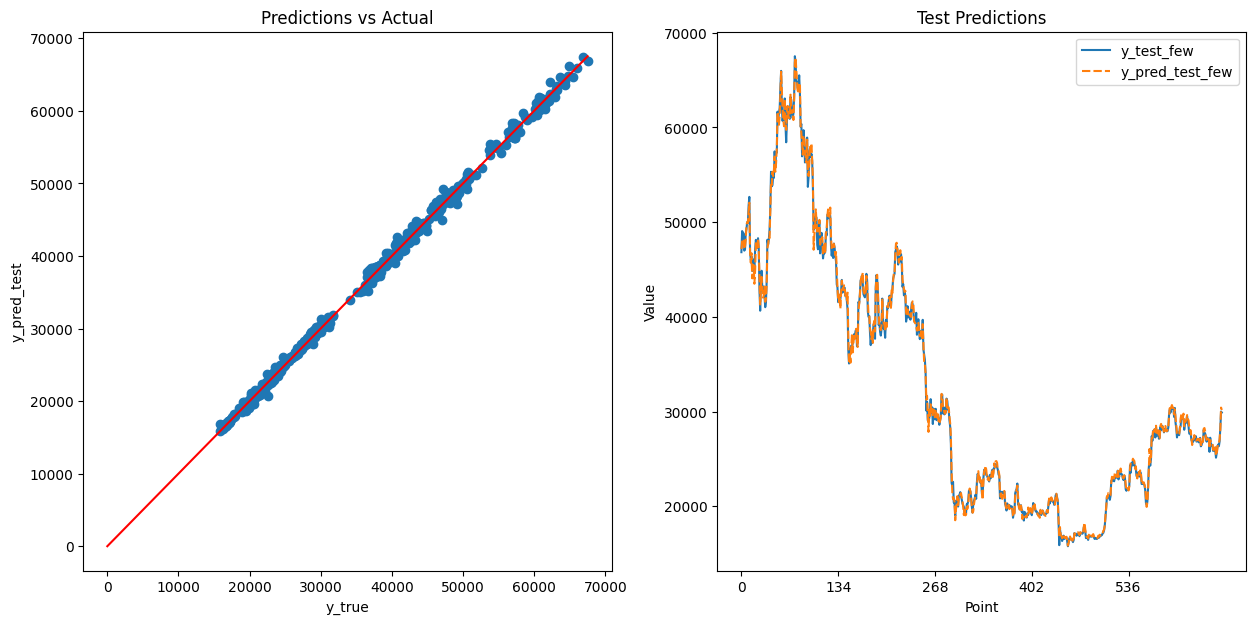

In [241]:
# Hold-out train Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.drop(['BTC_close', 'Date'], axis=1)
y = data['BTC_close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle = False) # shuffle: default: True, False sẽ giúp dùn qk để train và dự báo cho tương lai. 
reg_model = LinearRegression()   # shuffle: default: True, False sẽ giúp dùn qk để train và dự báo cho tương lai. 
reg_model.fit(X_train,y_train)

y_pred_train = reg_model.predict(X_train)
y_pred_test = reg_model.predict(X_test)

Evaluate_Model(y_train, y_pred_train, y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, len(y_test))

##  3.2 Lasso and Ridge reg

- Lasso and Ridge Regression are two regularization methods used to reduce overfitting in Linear Regression model.    
    - Lasso uses L1 regularization: to remove unimportant variables completely BY push the coefficients to zero completely. 
    - Ridge uses L2 regularization: to remove unimportant variables incompletely BY push the coefficients close to zero, but never down to zero completely.    
- The choice between these two methods depends on THE NUMBER OF FEATURES AND INFLUENCE OF EACH FEATURE.

In [242]:
# SIMPLE Ridge Regression when hyperparameters have not been adjusted
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.5, solver='lsqr') # lsqr: tối ưu
ridge_model.fit(X_train, y_train)

y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

Evaluate_Model(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge)

EVALUATE METRICS ON THE TRAIN SET
Coefficient of determination R2: 0.5392594967815268
Mean Squared Error MSE: 83372439.69142851
Root Mean Squared Error RMSE: 9130.850983967952
Mean Absolute Error MAE: 6216.853079172411
Mean Absolute Percentage Error MAPE% 68.31% 

EVALUATE METRICS ON THE TEST SET
Coefficient of determination R2: -2.597972717188602
Mean Squared Error MSE: 631106763.7811542
Root Mean Squared Error RMSE: 25121.838383787803
Mean Absolute Error MAE: 22336.81916084347
Mean Absolute Percentage Error MAPE% 85.84%


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.44935e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.80873e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.62922e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.44935e-29): result may not be

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

Best parameters found:  {'alpha': 100, 'random_state': 42, 'solver': 'svd'}
EVALUATE METRICS ON THE TRAIN SET
Coefficient of determination R2: 0.999436552678899
Mean Squared Error MSE: 101957.56064345346
Root Mean Squared Error RMSE: 319.3079401509669
Mean Absolute Error MAE: 141.61785026877251
Mean Absolute Percentage Error MAPE% 1.44% 

EVALUATE METRICS ON THE TEST SET
Coefficient of determination R2: 0.9985471116869172
Mean Squared Error MSE: 254845.63488341885
Root Mean Squared Error RMSE: 504.8223795390007
Mean Absolute Error MAE: 354.5853085446833
Mean Absolute Percentage Error MAPE% 1.07%
BTC_open                 -4.809058e-01
BTC_high                  8.933461e-01
BTC_low                   5.821735e-01
difficulty               -5.389199e-12
addresses_active_count    2.318651e-04
sum_lock_weight          -2.894807e-07
mean_lock_size_ytes      -2.839265e-05
total_fees_usd            1.764249e-05
mean_hash_rate            6.356178e-07
xfer_cnt                 -1.025619e-04
mean_tx

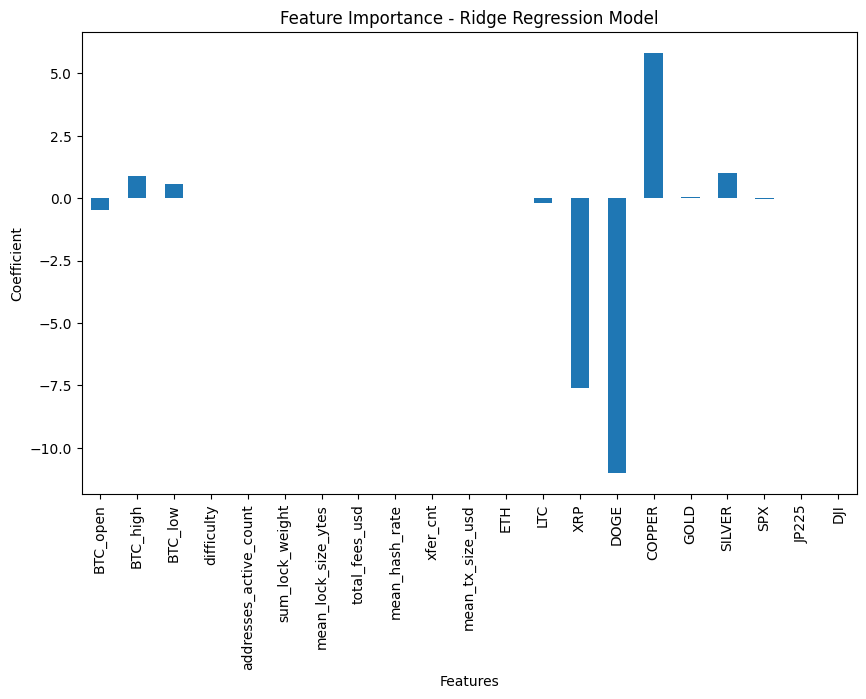

In [243]:
# ADJUST Ridge Regression BEST hyperparameters.
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
import matplotlib.pyplot as plt

# Train Ridge model to find best hyperparam
ridge_model = Ridge()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    # 'fit_intercept': [True, False],
    # 'copy_X': [True, False],
    # 'max_iter': [None, 1000, 5000],
    # 'tol': [0.001, 0.0001, 0.00001],
    # 'positive': [True, False],
    'random_state': [42] # or any other integer value
}

tscv = TimeSeriesSplit(n_splits=3)
grid_search_model = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=tscv, verbose=0)
                 # estimator: model ước tính, verbose=0 ẩn info process. 
grid_search_model.fit(X_train, y_train)
print("Best parameters found: ", grid_search_model.best_params_)

best_ridge_model = grid_search_model.best_estimator_

y_pred_train_ridge = best_ridge_model.predict(X_train)
y_pred_test_ridge = best_ridge_model.predict(X_test)

Evaluate_Model(y_train, y_pred_train_ridge, y_test, y_pred_test_ridge)

# Quan sát coef của các features và show các important features
coef_np = best_ridge_model.coef_      # <class 'numpy.ndarray'>
coef_pdSeries = pd.Series(coef_np, index=X.columns) # tạo pandas Series obj chứa coef_ và index/gán nhãn nó = tên cột của X
print(coef_pdSeries, type(coef_pdSeries)) # <class 'pandas.core.series.Series'>, tương tự df, but have only 1 col, tuple (index)    

important_features = X.columns[coef_np != 0]
print('Important features:', important_features)

# Bar plot important features. 
plt.figure(figsize=(10, 6))
coef_pdSeries.plot(kind='bar')

plt.title('Feature Importance - Ridge Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()


In [244]:
class LinearRegressionModel:
    def __init__(self, X_train, y_train, model, param_grid):
        """
        Constructor for Linear Regression Model Class.
        
        :param X_train: (pandas DataFrame) feature training set
        :param y_train: (numpy array) target training set
        :param model: (sklearn regression model type) type of regression model to use
        :param param_grid: (dictionary) dictionary containing hyperparameters for the model
        """
        self.X_train = X_train
        self.y_train = y_train
        
        # Initialize regression model to search for best hyperparameters
        self.model = model()
        self.param_grid = param_grid
        self.tscv = TimeSeriesSplit(n_splits=3)
        
    def print_best_param(self):
        """
        Find the best hyperparameters for the linear regression model using GridSearchCV.
        """
        grid_search_model = GridSearchCV(estimator=self.model, param_grid=self.param_grid, cv=self.tscv, verbose=0)
        grid_search_model.fit(self.X_train, self.y_train)

        # Print the best hyperparameters found
        print("Best parameters found: ", grid_search_model.best_params_)

        self.best_linear_reg_model = grid_search_model.best_estimator_
    

    def get_coef_pdSeries(self):
        # Trả về pandas Series chứa hệ số của các features
        coef_np = self.best_linear_reg_model.coef_      # <class 'numpy.ndarray'>
        coef_pdSeries = pd.Series(coef_np, index=X.columns) # tạo pandas Series obj chứa coef_ và index/gán nhãn nó = tên cột của X
        return coef_pdSeries # <class 'pandas.core.series.Series'>, tương tự df, but have only 1 col, tuple (index)    

    def print_important_features(self):
        # Trả về danh sách các feature quan trọng (có hệ số khác 0)
        coef_np = self.best_linear_reg_model.coef_
        important_features = self.X_train.columns[coef_np != 0]
        print('Important features:', important_features)

    def plot_coef_bar(self):
        """
        Plot bar graph showing the coefficients for each feature in the trained linear regression model.
        """
        coef_pdSeries = pd.Series(self.best_linear_reg_model.coef_, index=self.X_train.columns)
        
        plt.figure(figsize=(12, 6))
        coef_pdSeries.plot(kind='bar')
 
        plt.title('Linear Regression Coefficients')
        plt.xlabel('Features')
        plt.ylabel('Coefficient Values')
        plt.show()

    def evaluate_model(self, y_train, y_pred_train, y_test, y_pred_test): # 
        """
        parameters: `y_train`, `y_pred_train`, `y_test`, `y_pred_test`
        calculates evaluation metrics,
           including R-squared, MSE, RMSE, MAE, MAPE,
        """
        y_pred_train_ridge = self.best_linear_reg_model.predict(X_train)
        y_pred_test_ridge = self.best_linear_reg_model.predict(X_test)

        print('EVALUATE METRICS ON THE TRAIN SET')
        print('Coefficient of determination R2:', r2_score(y_train, y_pred_train)) # print(model.score(X_test, y_train))
        print('Mean Squared Error MSE:', mean_squared_error(y_train, y_pred_train))
        print('Root Mean Squared Error RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
        print('Mean Absolute Error MAE:', mean_absolute_error(y_train, y_pred_train))
        MAPE = mean_absolute_percentage_error(y_train, y_pred_train)
        # MAPE = np.mean(np.abs((np.array(y_train) - np.array(y_pred_train)) / y_train))
        print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 2)}%", '\n')
        
        print('EVALUATE METRICS ON THE TEST SET')
        print('Coefficient of determination R2:', r2_score(y_test, y_pred_test)) # print(model.score(X_test, y_test))
        print('Mean Squared Error MSE:', mean_squared_error(y_test, y_pred_test))
        print('Root Mean Squared Error RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
        print('Mean Absolute Error MAE:', mean_absolute_error(y_test, y_pred_test))
        MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
        # MAPE = np.mean(np.abs((np.array(y_test) - np.array(y_pred_test)) / y_test))
        print('Mean Absolute Percentage Error MAPE%', f"{round(MAPE*100, 2)}%")


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.44935e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.80873e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.62922e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.44935e-29): result may not be

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

Best parameters found:  {'alpha': 100, 'random_state': 42, 'solver': 'svd'}
Important features: Index(['BTC_open', 'BTC_high', 'BTC_low', 'difficulty',
       'addresses_active_count', 'sum_lock_weight', 'mean_lock_size_ytes',
       'total_fees_usd', 'mean_hash_rate', 'xfer_cnt', 'mean_tx_size_usd',
       'ETH', 'LTC', 'XRP', 'DOGE', 'COPPER', 'GOLD', 'SILVER', 'SPX', 'JP225',
       'DJI'],
      dtype='object')


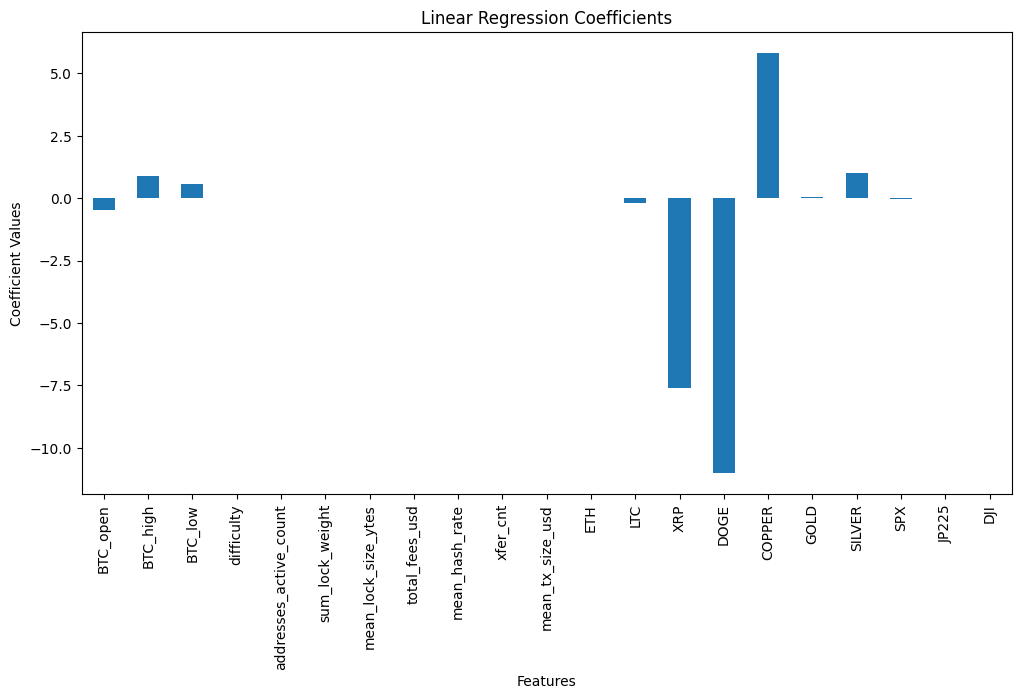

EVALUATE METRICS ON THE TRAIN SET
Coefficient of determination R2: 0.9994388352939149
Mean Squared Error MSE: 101544.51429432491
Root Mean Squared Error RMSE: 318.66050005346585
Mean Absolute Error MAE: 141.01702344214556
Mean Absolute Percentage Error MAPE% 1.34% 

EVALUATE METRICS ON THE TEST SET
Coefficient of determination R2: 0.9985617978735467
Mean Squared Error MSE: 252269.58652380775
Root Mean Squared Error RMSE: 502.2644587503756
Mean Absolute Error MAE: 348.09375134736683
Mean Absolute Percentage Error MAPE% 1.06%


In [245]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    # 'fit_intercept': [True, False],
    # 'copy_X': [True, False],
    # 'max_iter': [None, 1000, 5000],
    # 'tol': [0.001, 0.0001, 0.00001],
    # 'positive': [True, False],
    'random_state': [42] # or any other integer value
}
ridge_model = LinearRegressionModel(X_train, y_train, Ridge, param_grid)
ridge_model.print_best_param()
ridge_model.get_coef_pdSeries()
ridge_model.print_important_features()
ridge_model.plot_coef_bar()
ridge_model.evaluate_model(y_train, y_pred_train, y_test, y_pred_test)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+05, tolerance: 2.117e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.300e+06, tolerance: 1.587e+06
  model = cd_fast.enet_coordinate_descent(


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.129e+07, tolerance: 2.212e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e+05, tolerance: 2.117e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

Best parameters found:  {'alpha': 10, 'random_state': 42}
Important features: Index(['BTC_open', 'BTC_high', 'BTC_low', 'difficulty',
       'addresses_active_count', 'sum_lock_weight', 'mean_lock_size_ytes',
       'total_fees_usd', 'mean_hash_rate', 'xfer_cnt', 'mean_tx_size_usd',
       'ETH', 'LTC', 'GOLD', 'SILVER', 'SPX', 'JP225', 'DJI'],
      dtype='object')


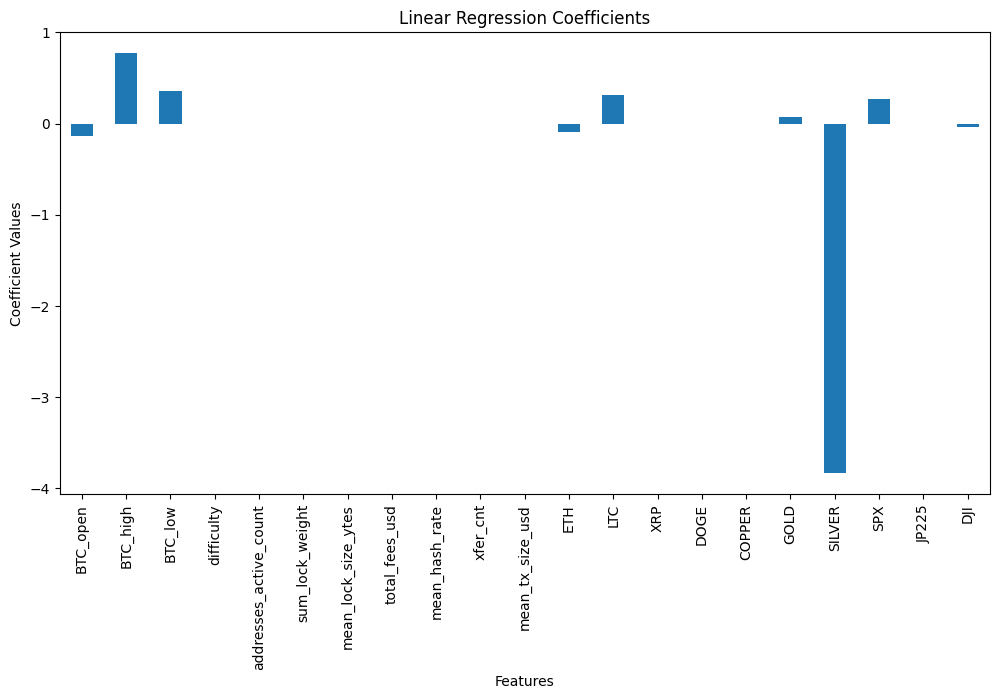

EVALUATE METRICS ON THE TRAIN SET
Coefficient of determination R2: 0.9994388352939149
Mean Squared Error MSE: 101544.51429432491
Root Mean Squared Error RMSE: 318.66050005346585
Mean Absolute Error MAE: 141.01702344214556
Mean Absolute Percentage Error MAPE% 1.34% 

EVALUATE METRICS ON THE TEST SET
Coefficient of determination R2: 0.9985617978735467
Mean Squared Error MSE: 252269.58652380775
Root Mean Squared Error RMSE: 502.2644587503756
Mean Absolute Error MAE: 348.09375134736683
Mean Absolute Percentage Error MAPE% 1.06%


In [246]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    # 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    # 'fit_intercept': [True, False],
    # 'copy_X': [True, False],
    # 'max_iter': [None, 1000, 5000],
    # 'tol': [0.001, 0.0001, 0.00001],
    # 'positive': [True, False],
    'random_state': [42] # or any other integer value
}
ridge_model = LinearRegressionModel(X_train, y_train, Lasso, param_grid)
ridge_model.print_best_param()
ridge_model.get_coef_pdSeries()
ridge_model.print_important_features()
ridge_model.plot_coef_bar()
ridge_model.evaluate_model(y_train, y_pred_train, y_test, y_pred_test)

### Important features Lasso Linear Regression: 
giải thích: 2.73e-01 = 0.273
1. Important features: ['BTC_high', 'Active_Addr_Cnt']

Actions: 
1. Thử nghiệm với các important features. (Loại bỏ các features không quan trọng hoặc có thể gây nhiễu).
2. Lựa chọn mô hình khác: Các important features có thể chỉ ra rằng mô hình tuyến tính như Linear Regression không đủ mạnh để mô hình hóa quan hệ phức tạp giữa các biến. Bạn có thể thử nghiệm các mô hình khác như Decision Tree, Random Forest, hoặc Gradient Boosting để xem liệu chúng có thể xử lý tốt hơn các important features.
3. Thử nghiệm các tổ hợp features: thử nghiệm các tổ hợp của các important features, (Có thể thêm hoặc nhân các features lại với nhau để tạo ra các features mới) -> subset features cải thiện hiệu suất.
Note: Việc lựa chọn quá nhiều hoặc quá ít features có thể ảnh hưởng đến hiệu suất model. -> đánh giá,thử nghiệm. 

In [ ]:
X_new1 = data[['BTC_open', 'BTC_high', 'BTC_low', 'difficulty',
       'addresses_active_count', 'sum_lock_weight', 'mean_lock_size_ytes',
       'total_fees_usd', 'mean_hash_rate', 'xfer_cnt', 'mean_tx_size_usd',
       'ETH', 'LTC', 'GOLD', 'SILVER', 'SPX', 'JP225', 'DJI']]
X_new2 = data[['BTC_open', 'BTC_high', 'BTC_low', 'ETH', 'LTC', 'GOLD', 'SPX', 'JP225', 'DJI']]
# X_new3 = data[['BTC_high', 'Active_Addr_Cnt']]

In [ ]:
# Hold-out với X_new1, X_new2

X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.25, random_state=42, shuffle = False)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
Evaluate_Model(y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, 80)

X_train, X_test, y_train, y_test = train_test_split(X_new2, y, test_size=0.25, random_state=42, shuffle = False)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
Evaluate_Model(y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, 80)


In [ ]:
# Ridge Regression with X_new1, X_new2
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.3, random_state=42, shuffle=False)
ridge_model = Ridge(alpha = 0.5, solver='lsqr') # lsqr: tối ưu
ridge_model.fit(X_train, y_train)
y_pred_test_ridge = ridge_model.predict(X_test)
Evaluate_Model(y_test, y_pred_test_ridge)
Plot_Model(y_test, y_pred_test_ridge, len(y_test))

X_train, X_test, y_train, y_test = train_test_split(X_new2, y, test_size=0.3, random_state=42, shuffle=False)
ridge_model = Ridge(alpha = 0.5, solver='lsqr') # lsqr: tối ưu
ridge_model.fit(X_train, y_train)
y_pred_test_ridge = ridge_model.predict(X_test)
Evaluate_Model(y_test, y_pred_test_ridge)
Plot_Model(y_test, y_pred_test_ridge, len(y_test))



In [ ]:
# Lasso với X_new2
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split

import matplotlib.pyplot as plt
import pandas as pd

# Chia train, valid, test: 1-... = 0.7, (0.15/0.85)*0.85=0.15, 015
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_new2, y, test_size=0.15, random_state=42, shuffle=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.15/0.85, random_state=42, shuffle=False)

# Huấn luyện mô hình Lasso để tìm alpha tốt nhất
lasso_model = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}  # create parameter

tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=tscv.split(X_train))
grid_search.fit(X_train, y_train) 

print('Best_alpha_Lasso:', grid_search.best_params_['alpha']) # lấy best alpha 

# Use best_alpha train lại model trên toàn bộ train valid
best_alpha = grid_search.best_params_['alpha']
lasso_model_best_alpha = Lasso(alpha=best_alpha)
lasso_model_best_alpha.fit(X_train_valid, y_train_valid)

y_pred_test_lasso = lasso_model_best_alpha.predict(X_test)
Evaluate_Model(y_test, y_pred_test_lasso)
Plot_Model(y_test, y_pred_test_lasso, 100)



# 4 - Đánh giá kết quả
- Đây là kết quả khi dùng file data chưa chuẩn hóa. 

| Metric     | Hold-out X | Hold-out X_new1 | Hold-out X_new2 |
| ---------- | ---------- | --------------- | --------------- |
| R2(~1)     | 0.9995     | 0.9989          | 0.9989          |
| MSE(min)   | 6012.373   | 289175.963      | 285777.986      |
| RMSE(min)  | 77.540     | 537.751         | 534.582         |
| MAE(min)   | 28.775     | 341.835         | 340.628         |
| MAPE%(min) | 65.63%     | 1.1%            | 1.12%           |
| AUC/DA ~ 1 | 0.6724     | 0.7627          | 0.7610          |

| Metric    | Ridge         | Lasso X,100 | Ridge X_new2 | Lasso X_new2,1000 |
| --------- | -------------| ------------| --------------|--------------|
| R2(~1)    | -0.464       | 0.996        | 0.999         | 0.9967        |
| MSE(min)  | 388460840.496| 632283.887  | 246574.974    | 569988.329   |
| RMSE(min) | 19709.409    | 795.162      | 496.563       | 754.976      |
| MAE(min)  | 15006.055    | 627.935      | 302.905       | 563.926      |
| MAPE%(min)| 47.2%        | 1.93%        | 1.12%         | 1.66%        |
| AUC/DA ~ 1| 0.507        | 0.666        | 0.759         | 0.6719       |

(Ridge và Lasso với X_new1 không cải thiện model gì nhiều)


- Kết quả khi dùng file data chuẩn hóa: 

| Metric     | Hold-out X | Hold-out X_new1 | Hold-out X_new2 |
| ---------- | ---------- | --------------- | --------------- |
| R2(~1)     | 0.9995     | 0.9989          | 0.9989          |
| MSE(min)   | 1.3185   | 289175.963      | 285777.986      |
| RMSE(min)  | 0.0011     | 537.751         | 534.582         |
| MAE(min)   | 0.0004     | 341.835         | 340.628         |
| MAPE%(min) | 301554430140.1%   | 1.1%            | 1.12%           |
| AUC/DA ~ 1 | 0.6724     | 0.7627          | 0.7610          |

| Metric    | Ridge         | Lasso X,0.001 | Ridge X_new1 |
| --------- | -------------| --------------| --------------|
| R2(~1)    | 0.889        | 0.976         | 0.999        |
| MSE(min)  | 0.006        | 0.000         | 0.000        |
| RMSE(min) | 0.080        | 0.029         | 0.008        |
| MAE(min)  | 0.057        | 0.026         | 0.005        |
| MAPE%(min)| 10.02%       | 5.03%         | 1.1%         |
| AUC/DA ~ 1| 0.644        | 0.652         | 0.763        |


(Hold-out với X_new3 tệ. Ridge X_new1 và X_new2, 3. Lasso với X_new1,2,3 đều chỉ ngang X ban đầu)




# 5 - Tổng kết: 

X_new1 = data[['BTC_open', 'BTC_high', 'BTC_low', 'BTC_volume', 'Active_Addr_Cnt',
       'Difficulty', 'Mean_Block_Size(in_bytes)', 'Sum_Block_Weight',
       'Total_Fees(USD)', 'Mean_Hashrate', 'Xfer_Cnt',
       'Mean_Tx_size(native_units)', 'ETH', 'LTC', 'GOLD', 'COPPER', 'S&P500',
       'DJI', 'JP225']]

Model tốt nhất vẫn là khi sử dụng X_new1 cho kết quả như nhau dù data gốc chưa chuẩn hóa hoặc đã chuẩn hóa. 

| Metric     | Reg X_new1 - normalized data | Reg X_new1 - unnormalized data |
| ---------- | ---------------------------- | ------------------------------ |
| R2(~1)     | 0.9989                       | 0.9989                         |
| MSE(min)   | 6.34e-05                     | 289175.963                     |
| RMSE(min)  | 0.00796                      | 537.751                        |
| MAE(min)   | 0.00506                      | 341.835                        |
| MAPE%(min) | 1.1%                         | 1.1%                           |
| AUC/DA ~ 1 | 0.7627                       | 0.7627                         |




In [ ]:
# Hold-out X_new1
X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.25, random_state=42, shuffle = False)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
Evaluate_Model(y_test, y_pred_test)
Plot_Model(y_test, y_pred_test, len(y_test))


In [ ]:
# Đóng gói def Evaluate_Model and def Plot_Model

import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Đóng gói def Evaluate_Model and def Plot_Model
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def Evaluate_Model(y_test, y_pred_test):
  # Calculate Area Under the Curve AUC / Direction Accuracy DA
  y_pred_test_direction = np.sign(np.diff(y_pred_test)) # np.sign chuyển 1/-1
  y_test_direction = np.sign(np.diff(y_test))
  compare = y_pred_test_direction == y_test_direction # compare 
  AUC = np.mean(compare)
  print("Hàm cũ của Minh Cường:", AUC)

def AUC(true_test,prediction_test):
    count = 0
    for i in range(1,len(true_test)):
        if (true_test[i] - true_test[i-1]) * (prediction_test[i] - true_test[i-1]) > 0:
            count += 1
    return count/(len(true_test)-1)

print('test thử Linear Regression của tui')

# Hold-out X_new1
X_train, X_test, y_train, y_test = train_test_split(X_new1, y, test_size=0.25, random_state=42, shuffle = False)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
Evaluate_Model(y_test, y_pred_test)


import numpy as np
y_test_np = np.asarray(y_test)
y_pred_test_np = np.asarray(y_pred_test)
print('Hàm mới của Long')
AUC( y_test_np, y_pred_test_np)

